In [1]:
import sqlite3
import pandas as pd

# connect to the dataset
myDB = './data/cephalopod_RnD.db'
connection = sqlite3.connect(myDB)

In [2]:
# read the data into a dataframe
mySQL = "SELECT * FROM spady_defense" 
df = pd.read_sql(mySQL, connection)

# how many records?
print(len(df))

87


In [3]:
# print the top of the dataframe
df.head()

,Treatment,LineCrosses,Active,TimetoReact,ReactionType,InkDischarge,BodyPattern,field8,field9,field10,field11,field12
0,Control,0,rest,n/a,n/a,n/a,n/a,None,None,None,None,None
1,Control,0,rest,n/a,n/a,n/a,n/a,None,None,None,None,None
2,Control,65,high activity,n/a,n/a,n/a,n/a,None,None,None,None,None
3,Control,0,rest,n/a,n/a,n/a,n/a,None,None,None,None,None
4,Control,0,rest,n/a,n/a,n/a,n/a,None,None,None,None,None


In [4]:
# print the tail
df.tail()

,Treatment,LineCrosses,Active,TimetoReact,ReactionType,InkDischarge,BodyPattern,field8,field9,field10,field11,field12
82,High,48,high activity,0.46666667,jet,yes,transparent,None,None,None,None,None
83,High,0,rest,0.53333333,jet,yes,n/a,None,None,None,None,None
84,High,0,rest,0.26666667,jet,yes,n/a,None,None,None,None,None
85,High,0,rest,0.53333333,jet,yes,no change,None,None,None,None,None
86,High,287,high activity,0.5,defence,no,no change,None,None,None,None,None


In [5]:
# print the a random middlish row
print(df.loc[[44]])

   Treatment  LineCrosses Active TimetoReact ReactionType InkDischarge  \
44       Mid            0   rest         0.5          jet          yes   

    BodyPattern field8 field9 field10 field11 field12  
44  transparent   None   None    None    None    None  


In [6]:
# what are the datatypes?
print(df.dtypes)

Treatment       object
LineCrosses      int64
Active          object
TimetoReact     object
ReactionType    object
InkDischarge    object
BodyPattern     object
field8          object
field9          object
field10         object
field11         object
field12         object
dtype: object


In [7]:
# correct the TimetoReact to float
df['TimetoReact'] = pd.to_numeric(df['TimetoReact'])
print(df.dtypes)

ValueError: Unable to parse string "n/a" at position 0

In [8]:
# An error! Let's force the string: n/a into a NaN
df['TimetoReact'] = pd.to_numeric(df['TimetoReact'], errors='coerce')
print(df.dtypes)

Treatment        object
LineCrosses       int64
Active           object
TimetoReact     float64
ReactionType     object
InkDischarge     object
BodyPattern      object
field8           object
field9           object
field10          object
field11          object
field12          object
dtype: object


In [9]:
# get an overview of our numeric data
df.describe()

,LineCrosses,TimetoReact
count,87.000000,54.000000
mean,39.114943,0.486420
std,90.590752,0.305403
min,0.000000,0.066667
25%,0.000000,0.300000
50%,0.000000,0.466667
75%,30.000000,0.558333
max,445.000000,1.933333


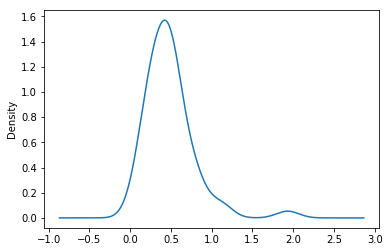

In [17]:
# visualize the data
df["TimetoReact"].plot(kind='kde')

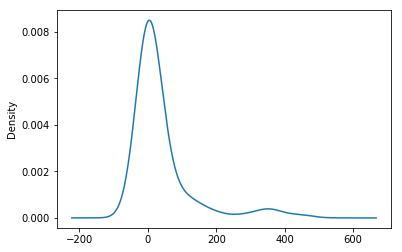

In [11]:
# visualize the data
df["LineCrosses"].plot(kind='kde')

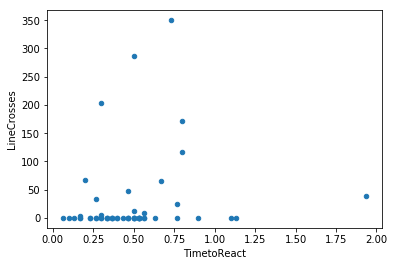

In [12]:
# any obvious correlation? 
df.plot(kind='scatter',x='TimetoReact',y='LineCrosses')

In [13]:
# lets go back to our strings
# Treatment    Active    ReactionType    InkDischarge    BodyPattern      
# field8    field9    field10    field11    field12

# first lets see if anything exists in the field columns
pd.notna(df['field8'])


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
      ...  
57    False
58    False
59    False
60    False
61    False
62    False
63    False
64    False
65    False
66    False
67    False
68    False
69    False
70    False
71    False
72    False
73    False
74    False
75    False
76    False
77    False
78    False
79    False
80    False
81    False
82    False
83    False
84    False
85    False
86    False
Name: field8, Length: 87, dtype: bool

In [14]:
# check again, using an aggregate
pd.notna(df['field8']).sum()

0

In [15]:
# check another way
df['field9'].unique().tolist()

[None]

In [16]:
# much more efficent way to check.
df[['field8', 'field9', 'field10', 'field11', 'field12']].drop_duplicates()

,field8,field9,field10,field11,field12
0,None,None,None,None,None


In [18]:
# remove the extra columns
# from pandas documentation:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
# -- axis : {0 or ‘index’, 1 or ‘columns’}, default 0
# ---- Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).
df.drop(['field8', 'field9', 'field10', 'field11', 'field12'], axis=1, inplace=True)

In [19]:
# check the other columns
# Treatment    Active    ReactionType    InkDischarge    BodyPattern 
for column in df.select_dtypes(include=object).keys():
    print("-----")
    print("Value counts in: %s" % column)
    print(df[column].value_counts())
    print("\n")

-----
Value counts in: Treatment
Control    31
High       29
Mid        27
Name: Treatment, dtype: int64


-----
Value counts in: Active
rest             58
high activity    23
low activity      6
Name: Active, dtype: int64


-----
Value counts in: ReactionType
jet        40
n/a        32
defence    15
Name: ReactionType, dtype: int64


-----
Value counts in: InkDischarge
no     36
yes    29
n/a    22
Name: InkDischarge, dtype: int64


-----
Value counts in: BodyPattern
no change      29
n/a            22
transparent    18
deimatic       14
flash           4
Name: BodyPattern, dtype: int64


